<a target="_blank" href="https://colab.research.google.com/github/cyneuro/Neural-Networks-Machine-Learning/blob/main/stats/Maximum_Likelihood_Estimation.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Maximum Likelihood Estimation

This notebook assumes the data is a standard continuous normal distribution. The number of random samples, mean, and standard deviation of the distribution can be set in lines 7-9 in code cell 1.

The function `gaussian` calculates the negative log likelihood given the random samples and the initial predicted mean and standard deviations defined in initParams.

The key to the whole program is the scipy function `minimize`. It is a regular optimization function and more information about it can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

**Note:** the method can be a lot of different options, all different mathematical optimization techniques.


#### Questions:
1. If everything is working, we would expect more accurate $\mu^*$ and $\sigma^*$ predictions with more random samples. Think about why this is.
2. What happens when the initial parameter guesses are extremely off? What about when they're extremely close? How does this impact the number of samples?
3. Break down each line in the `gaussian` function. Knowing what you know about MLE, what do you think the function `stats.norm.logpdf` does?

Answer 1: As prediction data is based on sample itteration and data comparison to find teh smoothest and most accurate curve the more samples and complex the final plynomial teh better the data can be represented for any guess. This is why in data gathering 3-points are standard but more are always welcome.

Answer 2: When the guess is far off there is a back and forth jump across the data set followed by rapid convergence. If the data point it too close then there is a jump out of the data set and then reconvergence to TOL.

Answer 3: The Gausisan functin has a set up phase where the mean and standard deviation are passed into a parameter array. Then it takes it amd moves it into teh nll calculation. -pn.sum(stats.norm.logpdf(sample_data, loc=mean, scale=sd)) where stats.norm.logpdf(sample_data, loc=mean, scale=sd) is used to get a normal log dist from teh sample array using the mean and sd as targeting factors for teh data spread, this is then summed using -np.sum() which has a (-) because it is a negitive log likelihood.

In [7]:
from scipy import stats
import numpy as np
from scipy.optimize import minimize
np.random.seed(1)


samples = 100
mu      = 1
sigma   = 2


#  Take random sample from the distribution of data (normal dist in this case)
sample_data = np.random.normal(loc=mu, scale=sigma, size=samples)

def gaussian(params):
    mean = params[0]
    sd = params[1]

    # Calculate negative log likelihood
    nll = -np.sum(stats.norm.logpdf(sample_data, loc=mean, scale=sd))

    return nll


initParams = [1, 1]

results = minimize(gaussian, initParams, method='Nelder-Mead')


print('mean*  = {:.3f} std*  = {:.3f}'.format(results.x[0],results.x[1]))
print('mean   = {:.3f} std   = {:.3f}'.format(mu, sigma))

mean*  = 1.121 std*  = 1.770
mean   = 1.000 std   = 2.000


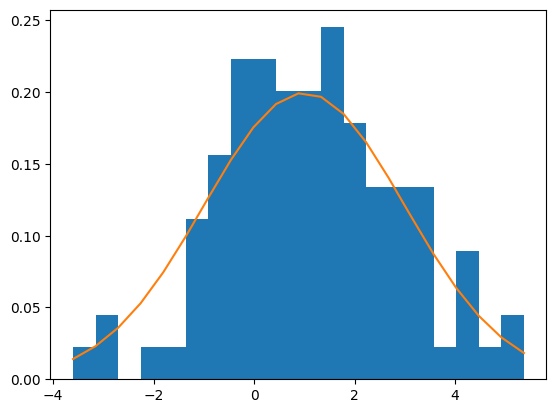

In [8]:
import matplotlib.pyplot as plt

def normal_dist(inp, mean, std):
    return 1./(np.sqrt(2.*np.pi)*std)*np.exp(-np.power((inp - mean)/std, 2.)/2)

x = np.arange(-10, 10, 0.1)
y = normal_dist(x, mu, sigma)

num_bins = 20

count, bins, ignored = plt.hist(sample_data, bins=num_bins, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ))
plt.show()